In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('/content/drive/MyDrive/Wasurenai/data/house_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Wasurenai/data/house_price/test.csv')

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### EDA

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.isnull().sum().sum()

6965

- 피쳐가 많으니까 일단 카운트 플롯으로 찍어 볼 수 있는 것 한번 찍어보면서 감을 잡아보자

<Axes: xlabel='MSSubClass', ylabel='count'>

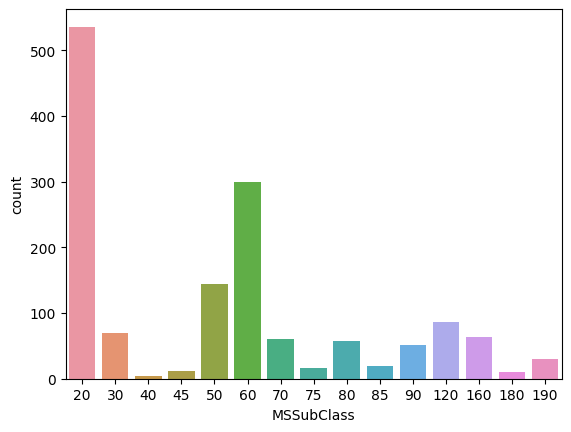

In [9]:
import seaborn as sns

sns.countplot(x='MSSubClass', data=train)

- MSSubClass는 20이 압도적으로 많고 그 다음이 60, 50 순

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

<Axes: xlabel='MSZoning', ylabel='count'>

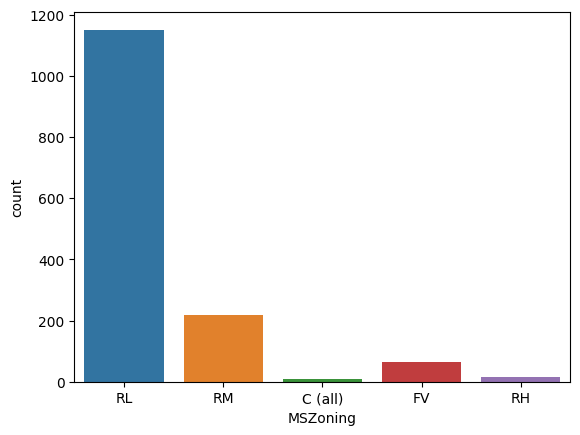

In [10]:
sns.countplot(x='MSZoning', data=train)

- MSZoning은 RL이 압도적으로 많음

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

Text(0.5, 0, 'index')

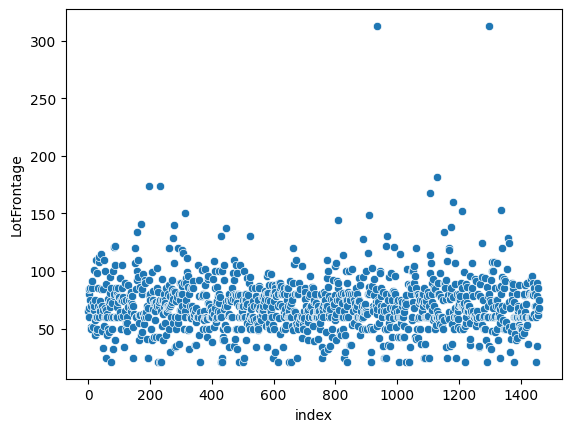

In [11]:
sns.scatterplot(train['LotFrontage'])
plt.xlabel('index')

- 대부분 0-200 사이에 존재함. 특히 50-100 구간에 몰려있음. 300 이상은 두개뿐.

- 가격 예측이므로 우선 연속형 데이터만 추려보자

In [12]:
train_con = train.select_dtypes(exclude='object')
train_con

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [13]:
train_con.shape

(1460, 38)

- 피쳐가 80개에서 38개로 많이 줄어듦

### Preprocessing

<Axes: >

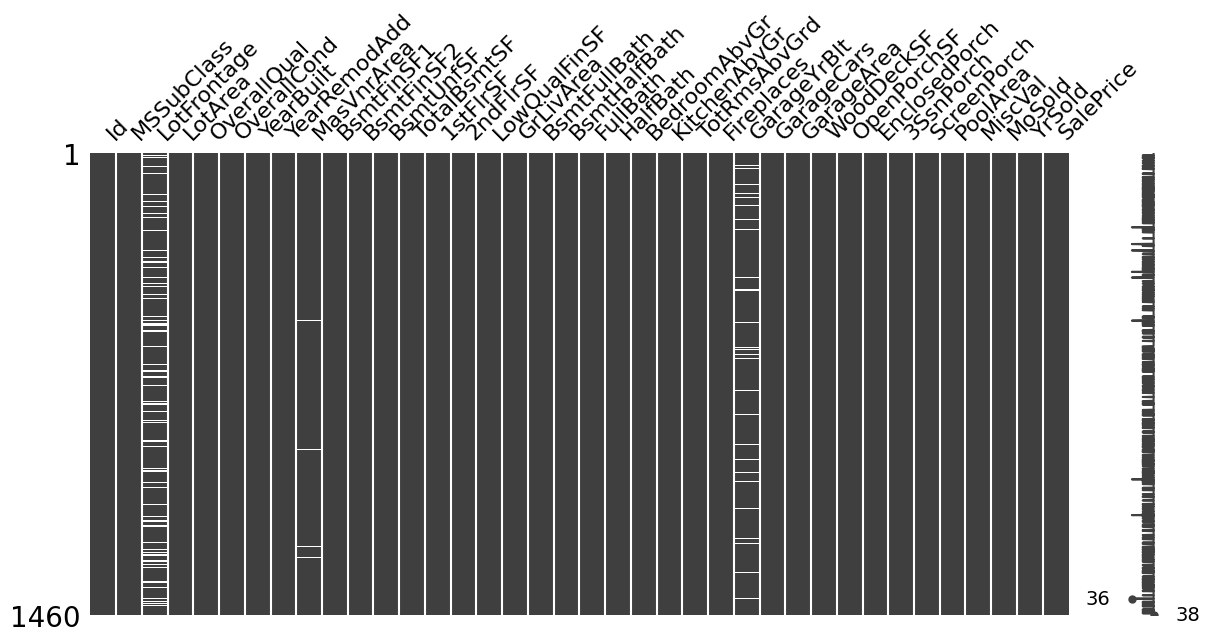

In [14]:
import missingno as msno
msno.matrix(train_con, figsize=(14,6))

In [15]:
train_con.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

- LotFrontage, MasVnrArea, GarageYrBlt 컬럼 결측치 처리해야함

- 1) LotFrontage 결측치 처리

In [16]:
train_con['LotFrontage'].isnull().sum()

259

In [17]:
# 결측치 처리
train_con['LotFrontage'].fillna(train_con['LotFrontage'].median(), inplace=True)
train_con['LotFrontage'].isnull().sum()

0

- 2) MasVnrArea 결측치 처리


In [18]:
train_con['MasVnrArea'].isnull().sum()

8

In [19]:
# 결측치 처리
train_con['MasVnrArea'].fillna(train_con['MasVnrArea'].median(), inplace=True)
train_con['MasVnrArea'].isnull().sum()

0

- 3) GarageYrBlt 결측치 처리

In [20]:
train_con['GarageYrBlt'].isnull().sum()

81

In [21]:
train_con['GarageYrBlt'].fillna(train_con['GarageYrBlt'].median(), inplace=True)
train_con['GarageYrBlt'].isnull().sum()

0

- 결측치만 처리한 뒤 모델 돌리기

In [22]:
train_data = train_con.drop('SalePrice', axis=1)
train_target = train_con['SalePrice']

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
neg_mean_scores = cross_val_score(lr, train_data, train_target, scoring ='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)

In [24]:
avg_rmse

36243.93822241509

- 모델 성능이 잘 안 나옴. 결측치 채운 3개 피쳐 이상치 확인해봄

- 1) LotFrontage 이상치 처리

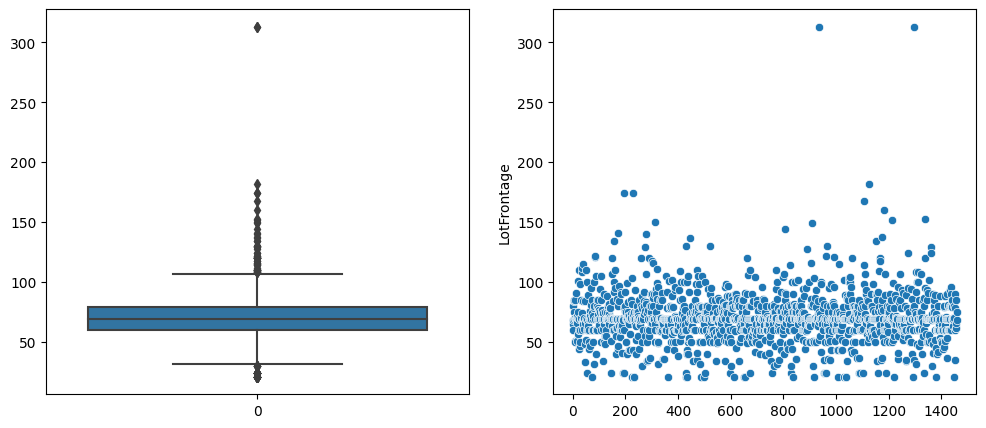

In [25]:
# 이상치 처리 전 plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax1 = sns.boxplot(train_con['LotFrontage'], ax=ax[0])
ax2 = sns.scatterplot(train_con['LotFrontage'], ax=ax[1])
plt.show()

In [26]:
LF_q1 = np.nanpercentile(train_con['LotFrontage'], 25)
LF_q3 = np.nanpercentile(train_con['LotFrontage'], 75)

LF_IQR = LF_q3 - LF_q1
LF_IQR

19.0

In [27]:
# 이상치 제외한 데이터 조회
train_con_1 = train_con[(train_con['LotFrontage'] >= LF_q1 - (1.5 * LF_IQR )) & (train_con['LotFrontage'] <= LF_q3 + (1.5 * LF_IQR ))]
print(train_con_1.shape) # 106개 잃어버림

(1354, 38)


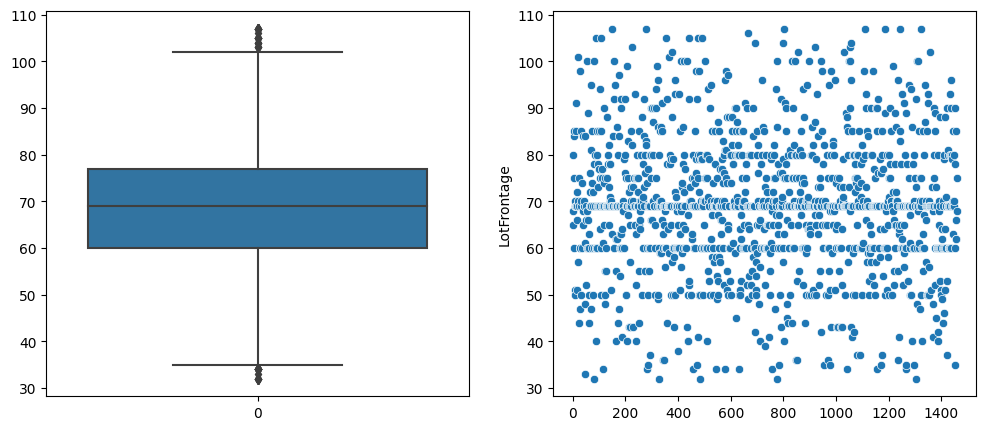

In [28]:
# 이상치 처리 후 plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax1 = sns.boxplot(train_con_1['LotFrontage'], ax=ax[0])
ax2 = sns.scatterplot(train_con_1['LotFrontage'], ax=ax[1])
plt.show()

- 2) GarageYrBlt 이상치 처리

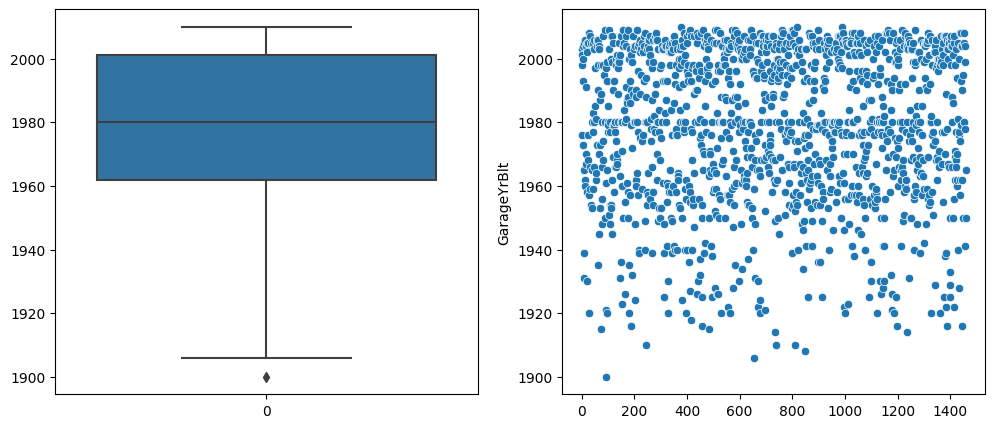

In [29]:
# 이상치 처리 전 plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax1 = sns.boxplot(train_con_1['GarageYrBlt'], ax=ax[0])
ax2 = sns.scatterplot(train_con_1['GarageYrBlt'], ax=ax[1])
plt.show()

- 할 필요 없어서 패스

- 3) MasVnrArea 이상치 처리

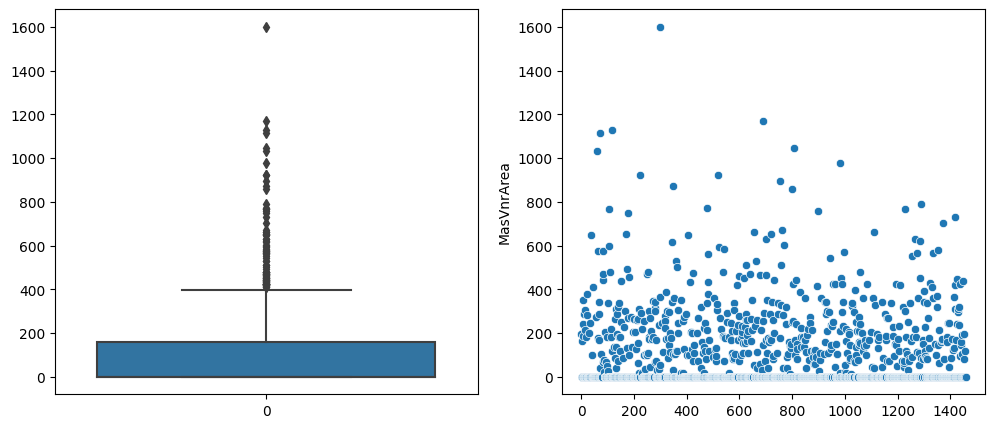

In [30]:
# 이상치 처리 전 plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax1 = sns.boxplot(train_con_1['MasVnrArea'], ax=ax[0])
ax2 = sns.scatterplot(train_con_1['MasVnrArea'], ax=ax[1])
plt.show()

In [31]:
MVA_q1 = np.nanpercentile(train_con_1['MasVnrArea'], 25)
MVA_q3 = np.nanpercentile(train_con_1['MasVnrArea'], 75)

MVA_IQR = MVA_q3 - MVA_q1
MVA_IQR

159.5

In [32]:
train_con_2 = train_con_1[(train_con_1['MasVnrArea'] >= MVA_q1 - (1.5 * MVA_IQR )) & (train_con_1['MasVnrArea'] <= MVA_q3 + (1.5 * MVA_IQR ))]
print(train_con_2.shape) # 87개 잃어버림

(1267, 38)


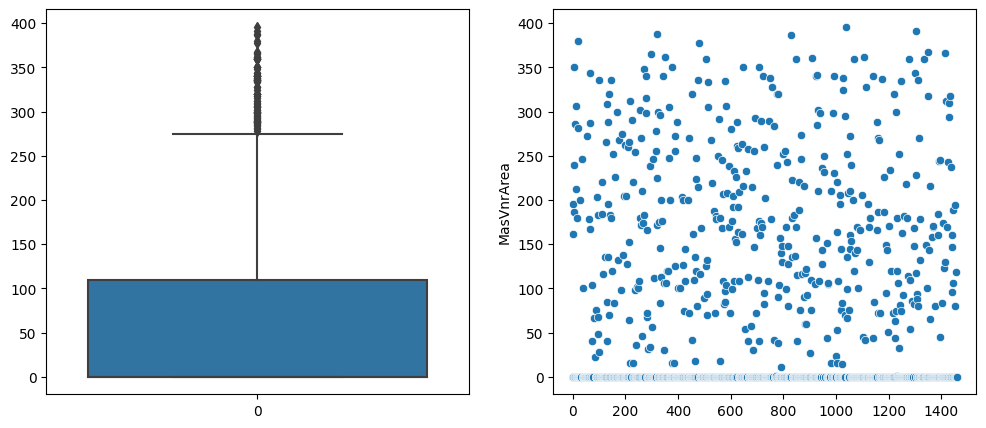

In [33]:
# 이상치 처리 후 plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax1 = sns.boxplot(train_con_2['MasVnrArea'], ax=ax[0])
ax2 = sns.scatterplot(train_con_2['MasVnrArea'], ax=ax[1])
plt.show()

- 'MasVnrArea'는 여전히 이상치 꽤 존재하나, IQR 처리 전에 비해 많이 줄어듦

In [34]:
train_data = train_con_2.drop('SalePrice', axis=1)
train_target = train_con_2['SalePrice']

lr = LinearRegression()
neg_mean_scores = cross_val_score(lr, train_data, train_target, scoring ='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

25814.25747917053

- IQR로 2개 피쳐(LotFrontage, GarageYrBlt) 이상치 잡았더니 평균 rmse 10,000 이상 감소
- 다른 피쳐들도 boxplot으로 이상치 확인해보자

In [35]:
columns = list(train_con_2.columns)
columns

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

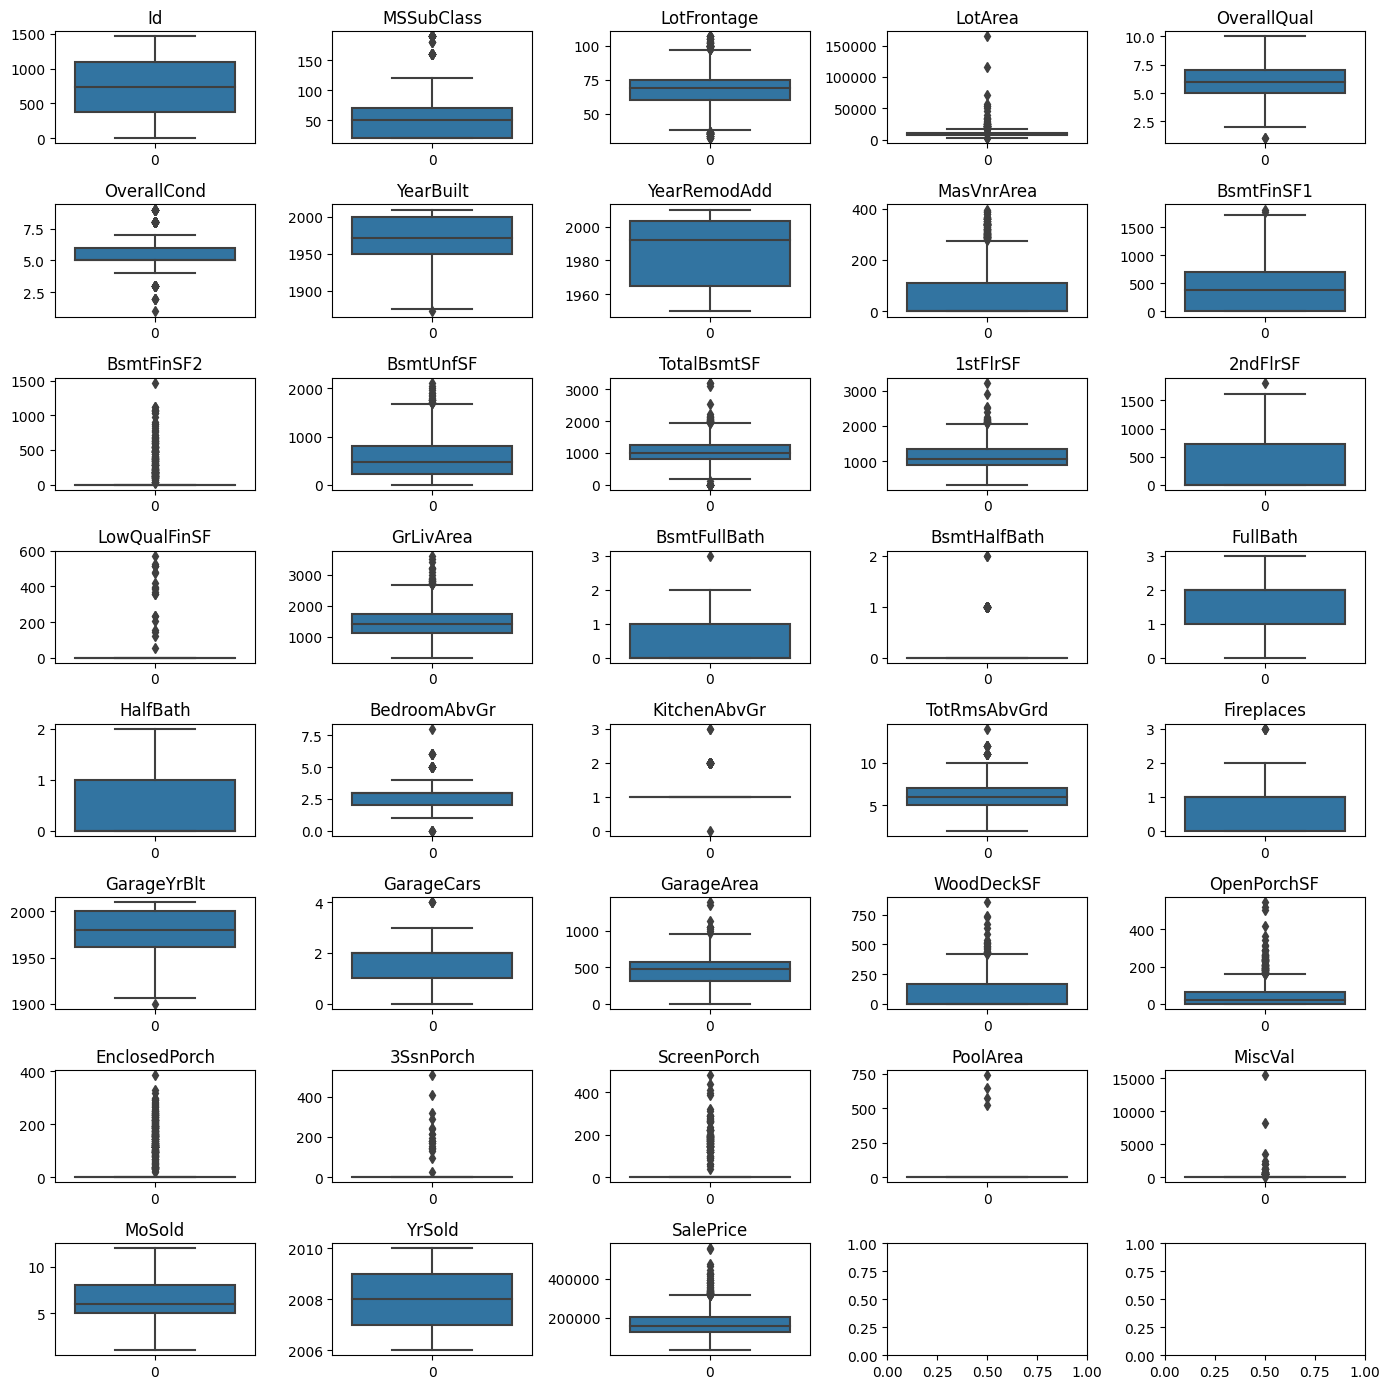

In [36]:
fig, ax = plt.subplots(8, 5, figsize=(14, 14))
for i, feature in enumerate(columns):
  row = int(i/5)
  col = i%5
  sns.boxplot(train_con_2[feature], ax=ax[row][col])
  ax[row][col].set_title(feature)
plt.tight_layout()
plt.show()

- boxplot이 온전히 보이지 않을 정도로 이상치 많은 10개 피쳐에 범위 재설정 및 피쳐 삭제

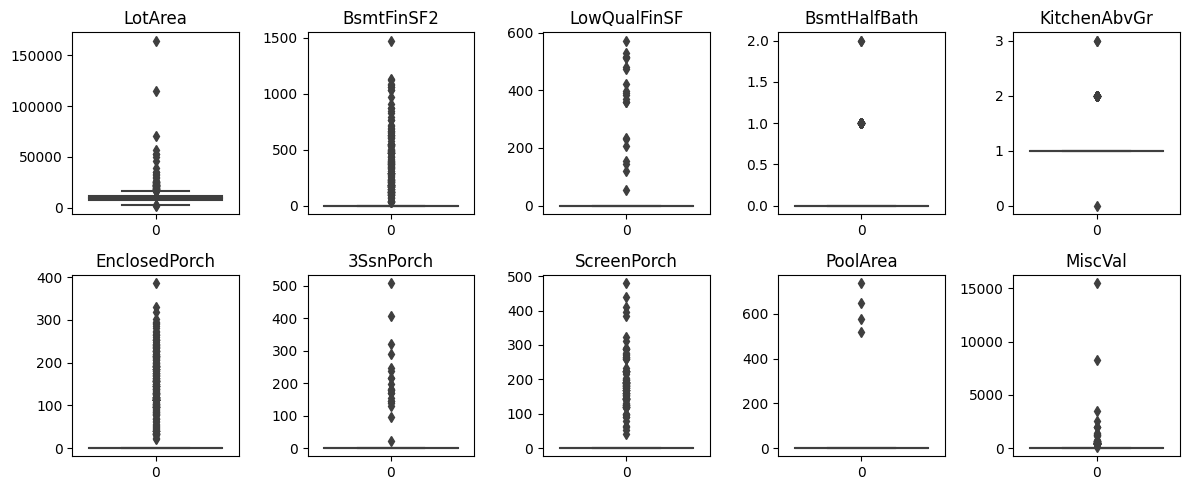

In [38]:
fig, ax = plt.subplots(2, 5, figsize=(12, 5))
IQR_features = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for i, feature in enumerate(IQR_features):
  row = int(i/5)
  col = i%5
  sns.boxplot(train_con_2[feature], ax=ax[row][col])
  ax[row][col].set_title(feature)
plt.tight_layout()
plt.show()

In [39]:
# 1) LotArea IQR
LA_q1 = np.nanpercentile(train_con_2['LotArea'], 25)
LA_q3 = np.nanpercentile(train_con_2['LotArea'], 75)
LA_IQR = LA_q3 - LA_q1

train_con_3 = train_con_2[(train_con_2['LotArea'] >= LA_q1 - (1.5 * LA_IQR )) & (train_con_2['LotArea'] <= LA_q3 + (1.5 * LA_IQR ))]
print(train_con_3.shape) # 1267->1204, 63개 잃어버림

(1204, 38)


<Axes: >

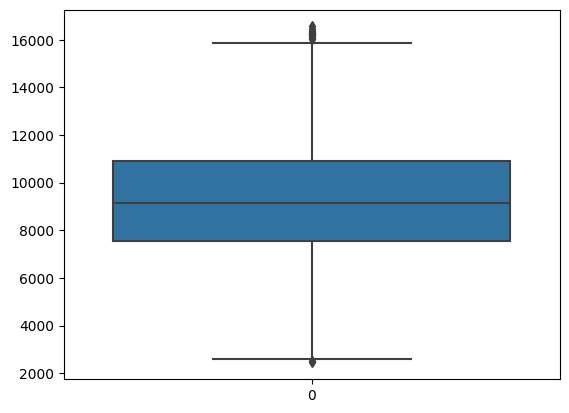

In [40]:
sns.boxplot(train_con_3['LotArea'])

In [41]:
train_data = train_con_3.drop(['SalePrice', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)
train_target = train_con_3['SalePrice']

lr = LinearRegression()
neg_mean_scores = cross_val_score(lr, train_data, train_target, scoring ='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

24596.91539753846

- rmse가 이상치 처리 전 약 36,244보다 10,000이상 감소

### Feature selection

In [44]:
train_con_3.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.015184,-0.042106,-0.017915,-0.016099,0.001287,-0.011702,-0.017046,-0.034338,-0.021616,...,-0.022779,-0.019538,0.021250,-0.075433,-0.000757,0.024308,-0.028300,0.012053,0.005999,-0.018956
MSSubClass,0.015184,1.000000,-0.277252,-0.295268,0.093581,-0.058909,-0.000605,0.062816,-0.019625,-0.042604,...,0.011525,0.028656,0.019294,-0.027495,-0.015386,-0.005801,-0.015012,-0.010494,-0.027447,-0.004900
LotFrontage,-0.042106,-0.277252,1.000000,0.518460,0.221458,-0.057662,0.188777,0.076383,0.279531,0.119165,...,0.079289,0.089710,-0.063202,0.077660,0.049736,0.026039,0.004516,0.038320,0.019145,0.342668
LotArea,-0.017915,-0.295268,0.518460,1.000000,0.189222,-0.033215,0.114052,0.051011,0.190755,0.161742,...,0.130411,0.109437,-0.050525,0.050972,0.092058,0.011777,0.043529,0.022362,-0.019037,0.374204
OverallQual,-0.016099,0.093581,0.221458,0.189222,1.000000,-0.083386,0.576350,0.539650,0.352404,0.186535,...,0.191362,0.308570,-0.129528,0.028502,0.048039,0.000538,-0.025531,0.083703,-0.016148,0.810438
OverallCond,0.001287,-0.058909,-0.057662,-0.033215,-0.083386,1.000000,-0.362633,0.084132,-0.114328,-0.039359,...,-0.013119,-0.028769,0.093881,0.016483,0.058448,0.013930,0.091293,-0.009121,0.036221,-0.090909
YearBuilt,-0.011702,-0.000605,0.188777,0.114052,0.576350,-0.362633,1.000000,0.585774,0.329518,0.263392,...,0.227133,0.183587,-0.414776,0.030034,-0.039569,0.007931,-0.041428,0.021587,-0.010780,0.592623
YearRemodAdd,-0.017046,0.062816,0.076383,0.051011,0.539650,0.084132,0.585774,1.000000,0.158354,0.113803,...,0.207585,0.219313,-0.203870,0.041559,-0.045306,0.008690,-0.003037,0.020828,0.046858,0.550105
MasVnrArea,-0.034338,-0.019625,0.279531,0.190755,0.352404,-0.114328,0.329518,0.158354,1.000000,0.232442,...,0.113373,0.115271,-0.121423,0.042691,0.043682,-0.004737,-0.038476,0.043911,0.016285,0.405118
BsmtFinSF1,-0.021616,-0.042604,0.119165,0.161742,0.186535,-0.039359,0.263392,0.113803,0.232442,1.000000,...,0.208907,0.049287,-0.128803,0.017102,0.076869,0.018396,-0.003801,0.011249,0.017022,0.361371


<Axes: >

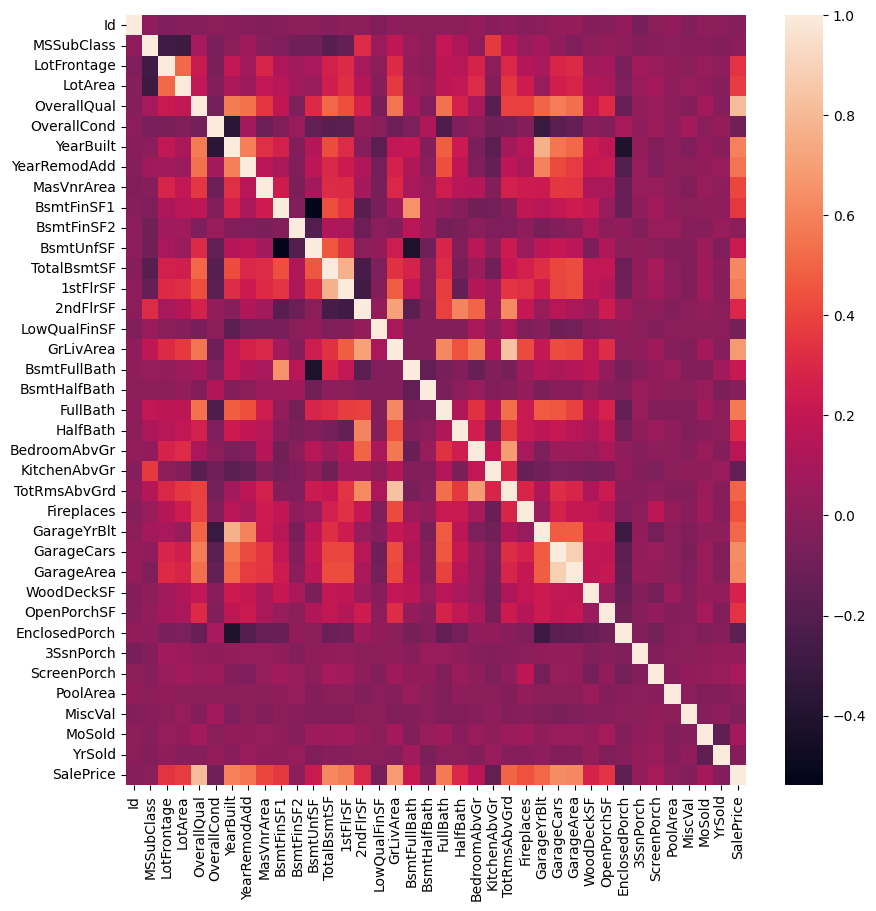

In [45]:
plt.figure(figsize=(10, 10))
corr = train_con_3.corr()
sns.heatmap(corr)

In [46]:
# target 변수(SalePrice)와 상관관계까 높은 순으로 출력
corr_order = corr.loc[:, 'SalePrice'].abs().sort_values(ascending=False)
corr_order

SalePrice        1.000000
OverallQual      0.810438
GrLivArea        0.683797
GarageCars       0.635307
TotalBsmtSF      0.617097
GarageArea       0.616189
YearBuilt        0.592623
1stFlrSF         0.583453
FullBath         0.573163
YearRemodAdd     0.550105
GarageYrBlt      0.507357
TotRmsAbvGrd     0.499631
Fireplaces       0.442701
MasVnrArea       0.405118
LotArea          0.374204
BsmtFinSF1       0.361371
LotFrontage      0.342668
OpenPorchSF      0.340889
HalfBath         0.302406
2ndFlrSF         0.293817
WoodDeckSF       0.276948
BsmtUnfSF        0.222437
BsmtFullBath     0.214328
BedroomAbvGr     0.169622
EnclosedPorch    0.162867
KitchenAbvGr     0.149881
ScreenPorch      0.092411
OverallCond      0.090909
MoSold           0.086765
LowQualFinSF     0.071757
3SsnPorch        0.032459
MiscVal          0.030396
YrSold           0.024103
Id               0.018956
BsmtHalfBath     0.018635
MSSubClass       0.004900
PoolArea         0.003063
BsmtFinSF2       0.002567
Name: SalePr

In [47]:
col = corr_order[corr_order>0.5]
col_list = list(col.index)

In [48]:
model_df = train_con_3.loc[:, col_list]
model_df

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,YearBuilt,1stFlrSF,FullBath,YearRemodAdd,GarageYrBlt
0,208500,7,1710,2,856,548,2003,856,2,2003,2003.0
1,181500,6,1262,2,1262,460,1976,1262,2,1976,1976.0
2,223500,7,1786,2,920,608,2001,920,2,2002,2001.0
3,140000,7,1717,3,756,642,1915,961,1,1970,1998.0
4,250000,8,2198,3,1145,836,2000,1145,2,2000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,460,1999,953,2,2000,1999.0
1456,210000,6,2073,2,1542,500,1978,2073,2,1988,1978.0
1457,266500,7,2340,1,1152,252,1941,1188,2,2006,1941.0
1458,142125,5,1078,1,1078,240,1950,1078,1,1996,1950.0


In [49]:
train_data = model_df.drop('SalePrice', axis=1)
train_target = model_df['SalePrice']

lr = LinearRegression()
neg_mean_scores = cross_val_score(lr, train_data, train_target, scoring ='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

27540.297867849476

- 상관관계가 높은 10개 피쳐만 넣어서 lr 돌렸을 때 오히려 rmse가 더 커짐(feature selection 전 rmse: 24,596)
- 연속형 변수뿐 아니라 이상형 변수도 추가해보자

### One-hot encoding

In [50]:
train_cat = train.select_dtypes(include='object')
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [51]:
train_data_cat = pd.get_dummies(train_cat)
train_data_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
train_data_con = train_con_3.drop(['SalePrice', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1)
train_data = pd.concat([train_data_con, train_data_cat], axis=1, join='inner')
print(train_data.shape)
train_data

(1204, 280)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [53]:
train_target = model_df['SalePrice']

lr = LinearRegression()
neg_mean_scores = cross_val_score(lr, train_data, train_target, scoring ='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

21401.011664337384

- 연속형 데이터만 돌렸을 때 rmse 약 24,596보다 3,000 이상 감소

### Ridge, Lasso, ElasticNet

In [54]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=10)
neg_mean_scores = cross_val_score(ridge, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)
avg_rmse

19405.22735764765

In [55]:
lasso = Lasso(alpha=10)
neg_mean_scores = cross_val_score(lasso, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)
avg_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+11, tolerance: 4.221e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+11, tolerance: 3.744e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+11, tolerance: 4.320e

20259.981581349337

In [56]:
elasticnet = ElasticNet(l1_ratio=0.2)
neg_mean_scores = cross_val_score(elasticnet, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)
avg_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.023e+11, tolerance: 4.221e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.952e+09, tolerance: 3.744e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+10, tolerance: 4.320e

23865.091359179394

- ridge 사용했을 때 rmse가 가장 작음

### Scaler 적용

- 가장 성능이 좋았던 ridge에 적용

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
minmax_scaler = MinMaxScaler()

ridge = Ridge()
pipeline = Pipeline([('minmax_scaler', minmax_scaler), ('ridge', ridge)])
neg_mean_scores = cross_val_score(pipeline, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)
avg_rmse

20123.319754867753

In [59]:
std_scaler = StandardScaler()

ridge = Ridge()
pipeline = Pipeline([('std_scaler', std_scaler), ('ridge', ridge)])
neg_mean_scores = cross_val_score(pipeline, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)
avg_rmse

21304.35085715341

- scaler 적용하니 rmse 증가

### Polynomial Regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2)
lr = LinearRegression()
pipeline = Pipeline([('poly', poly), ('lr', lr)])
neg_mean_scores = cross_val_score(pipeline, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)

print('RMSE:', rmse)
print('평균 RMSE:', avg_rmse)

RMSE: [46341.14425119 49662.55556872 55010.23716996 40757.05051705
 53102.25103603]
평균 RMSE: 48974.64770859111


In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2)
ridge = Ridge()
pipeline = Pipeline([('poly', poly), ('ridge', ridge)])
neg_mean_scores = cross_val_score(pipeline, train_data, train_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1 * neg_mean_scores)
avg_rmse = np.mean(rmse)

print('RMSE:', rmse)
print('평균 RMSE:', avg_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


RMSE: [46607.2560862  49356.00816011 52968.63221349 40472.72354972
 53911.16987387]
평균 RMSE: 48663.15797667898


- degree 2로 설정하여 돌렸을 때 rmse 폭발적으로 증가 (degree 더 키우면 코랩 세션 종료 문제로 일단 2까지만 돌려봄)